<a href="https://colab.research.google.com/github/cdhakami-p/CSCI-B455/blob/main/hw1/q1/hw1_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1 Question 1**

In [14]:
# Import initial libraries and dataset

import numpy as np
import pandas as pd
from IPython.display import display

train_data = pd.read_csv("happiness_data_train.csv")
test_data = pd.read_csv("happiness_data_test.csv")

# Preview training data

train_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,4.930,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331
1,5.367,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199
2,7.375,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161
3,4.613,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195
4,6.180,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN


# **PART A:**

Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?


In [15]:
print("Number of (instances, attributes):", train_data.shape)

# Type of each attribute & non-null counts
print("\nType of data for each attribute & non-null counts: ")
print(train_data.info(memory_usage=False, ))

# Null counts
null_counts = train_data.isnull().sum()
print("\nNull values per attribute: \n")
print(null_counts.to_string() + "\n")

print("\nAll attribute data types are continuous floats.")
print("There are no instances with null Life Ladder attributes, but each other attribute is missing in 10-86 instances as listed above.")


Number of (instances, attributes): (1559, 9)

Type of data for each attribute & non-null counts: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1559 non-null   float64
 1   Log GDP per capita                1533 non-null   float64
 2   Social support                    1549 non-null   float64
 3   Healthy life expectancy at birth  1522 non-null   float64
 4   Freedom to make life choices      1537 non-null   float64
 5   Generosity                        1488 non-null   float64
 6   Perceptions of corruption         1473 non-null   float64
 7   Positive affect                   1542 non-null   float64
 8   Negative affect                   1545 non-null   float64
dtypes: float64(9)None

Null values per attribute: 

Life Ladder                          0
Log GDP per

**Part A Summary:**

All attribute data types are continuous floats.

There are no instances with null Life Ladder attributes, but each other attribute is missing in 10-86 instances as listed above.

# **PART B:**

Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.

Explain noticeable traits for key attributes. Are there any attributes that might require special treatment?

If so, what special treatment might they require?

In [16]:
# Statistical summary
print("Statistical summary of the training data: ")
display(train_data.describe().T)


Statistical summary of the training data: 


,count,mean,std,min,25%,50%,75%,max
Life Ladder,1559.0,5.469321,1.113280,2.375,4.6495,5.374,6.2725,8.019
Log GDP per capita,1533.0,9.362995,1.160240,6.635,8.4600,9.456,10.3320,11.648
Social support,1549.0,0.812689,0.118762,0.290,0.7530,0.835,0.9050,0.987
Healthy life expectancy at birth,1522.0,63.331680,7.478307,32.300,58.3400,65.180,68.5350,77.100
Freedom to make life choices,1537.0,0.741882,0.142326,0.260,0.6460,0.763,0.8550,0.985
Generosity,1488.0,0.000343,0.163385,-0.335,-0.1130,-0.025,0.0910,0.698
Perceptions of corruption,1473.0,0.748248,0.186708,0.035,0.6910,0.804,0.8730,0.983
Positive affect,1542.0,0.708551,0.108029,0.322,0.6230,0.721,0.7980,0.944
Negative affect,1545.0,0.267644,0.084431,0.083,0.2060,0.258,0.3190,0.705


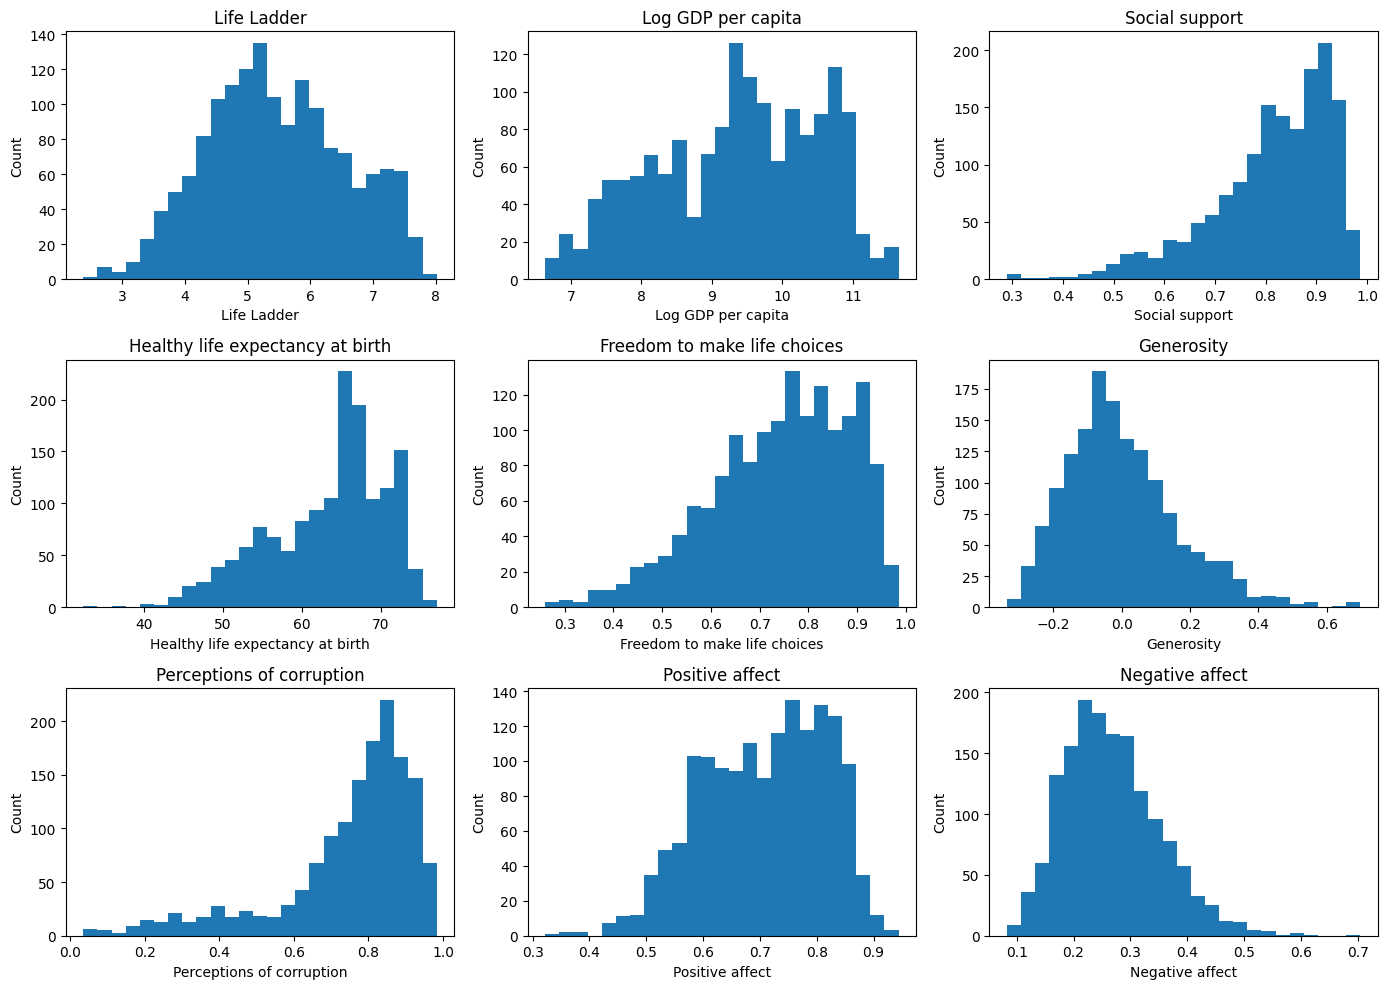

In [17]:
import matplotlib.pyplot as plt

# Histogram representation
attribute_cols = train_data.columns

plt.figure(figsize=(14,10))

for i, col in enumerate(attribute_cols, 1):
  plt.subplot(3,3,i)
  plt.hist(train_data[col].dropna(), bins=25)
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Boxplot representation

In [18]:
# Check for skew
display(train_data.skew())

,0
Life Ladder,0.074998
Log GDP per capita,-0.292395
Social support,-1.137804
Healthy life expectancy at birth,-0.722594
Freedom to make life choices,-0.606357
Generosity,0.828245
Perceptions of corruption,-1.536457
Positive affect,-0.347713
Negative affect,0.696474


**Part B Summary:**

Life Ladder
 - Mean = 5.47, STD = 1.11
 - Roughly bell shapes and symmetric, no skew

Log GDP per Capita
 - Mean = 9.36, STD = 1.16
 - Distribution is wide and more uniform

Social Support
 - Mean = 0.81, STD = 0.12
 - Strong left skew (-1.14)
 - 0 to 1 range
  
Healthy Life Expectancy
 - Mean = 63.33, STD = 7.48
 - Large range (32.3-77.1)
 - Moderate left skew (-0.72)

Freedom to Make Life Choices
 - Mean = 0.74, STD = 0.14
 - 0 to 1 range

Generosity
 - Mean = 0.00034, STD = 0.16
 - Right skew (0.83)
 - 0 to 1 range

Perceptions of Corruption
 - Mean = 0.75, STD = 0.19
 - Strong left skew (-1.54)
 - 0 to 1 range

Positive Affect
 - Mean = 0.71, STD = 0.11
 - 0 to 1 range
  
Negative Affect
 - Mean = 0.27, STD = 0.08
 - Moderate right skew (0.70)
 - 0 to 1 range
    
  
In order to treat missing values, can replace missing entries with median value for each attribute, since all are continuous and only missing a small percentage of entries.

Given the skewness and differing ranges for certain attributes, will need to perform scaling and possibly other transformations in order to see best results.


# **PART C:**

Analyze the relationships between the data attributes, and between the data attributes and label.


In [19]:
# Create correlation matrix

corr_matrix = train_data.corr()

display(corr_matrix)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.786712,0.703878,0.750773,0.529819,0.194970,-0.427562,0.534640,-0.301821
Log GDP per capita,0.786712,1.000000,0.696893,0.850872,0.359674,-0.006162,-0.341493,0.296017,-0.215581
Social support,0.703878,0.696893,1.000000,0.621460,0.420372,0.062367,-0.225764,0.424982,-0.403880
Healthy life expectancy at birth,0.750773,0.850872,0.621460,1.000000,0.381830,0.019077,-0.322159,0.311821,-0.137307
Freedom to make life choices,0.529819,0.359674,0.420372,0.381830,1.000000,0.327079,-0.480826,0.614398,-0.272536
Generosity,0.194970,-0.006162,0.062367,0.019077,0.327079,1.000000,-0.276108,0.377166,-0.106673
Perceptions of corruption,-0.427562,-0.341493,-0.225764,-0.322159,-0.480826,-0.276108,1.000000,-0.300299,0.277781
Positive affect,0.534640,0.296017,0.424982,0.311821,0.614398,0.377166,-0.300299,1.000000,-0.357850
Negative affect,-0.301821,-0.215581,-0.403880,-0.137307,-0.272536,-0.106673,0.277781,-0.357850,1.000000


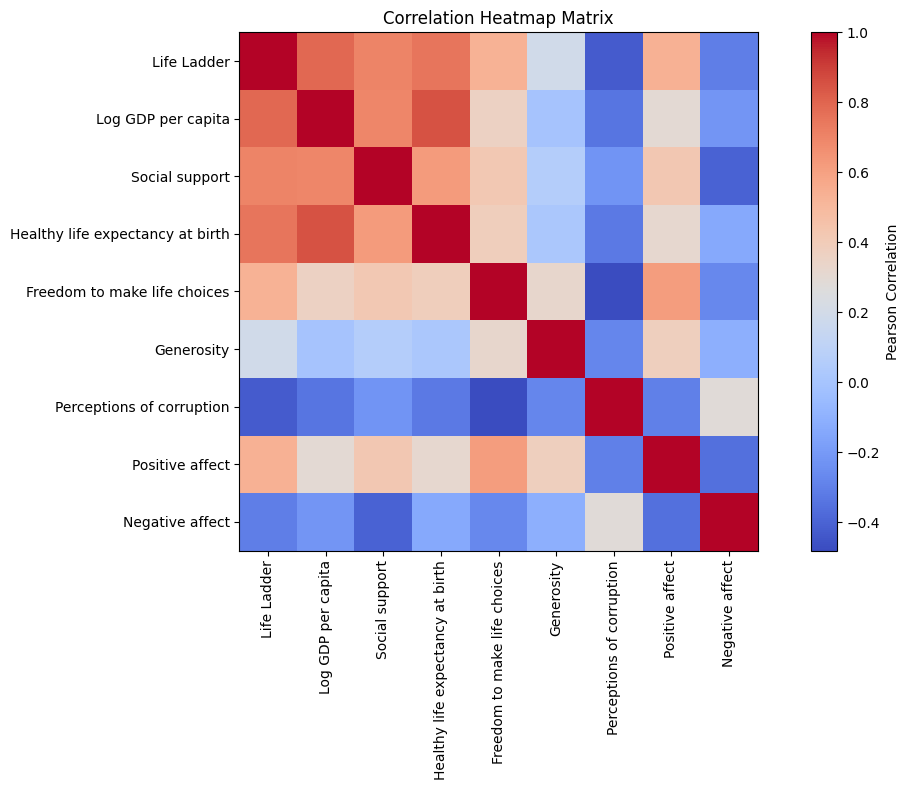

In [20]:
# Heatmap matrix

plt.figure(figsize=(12,8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar(label="Pearson Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap Matrix")
plt.tight_layout()
plt.show()

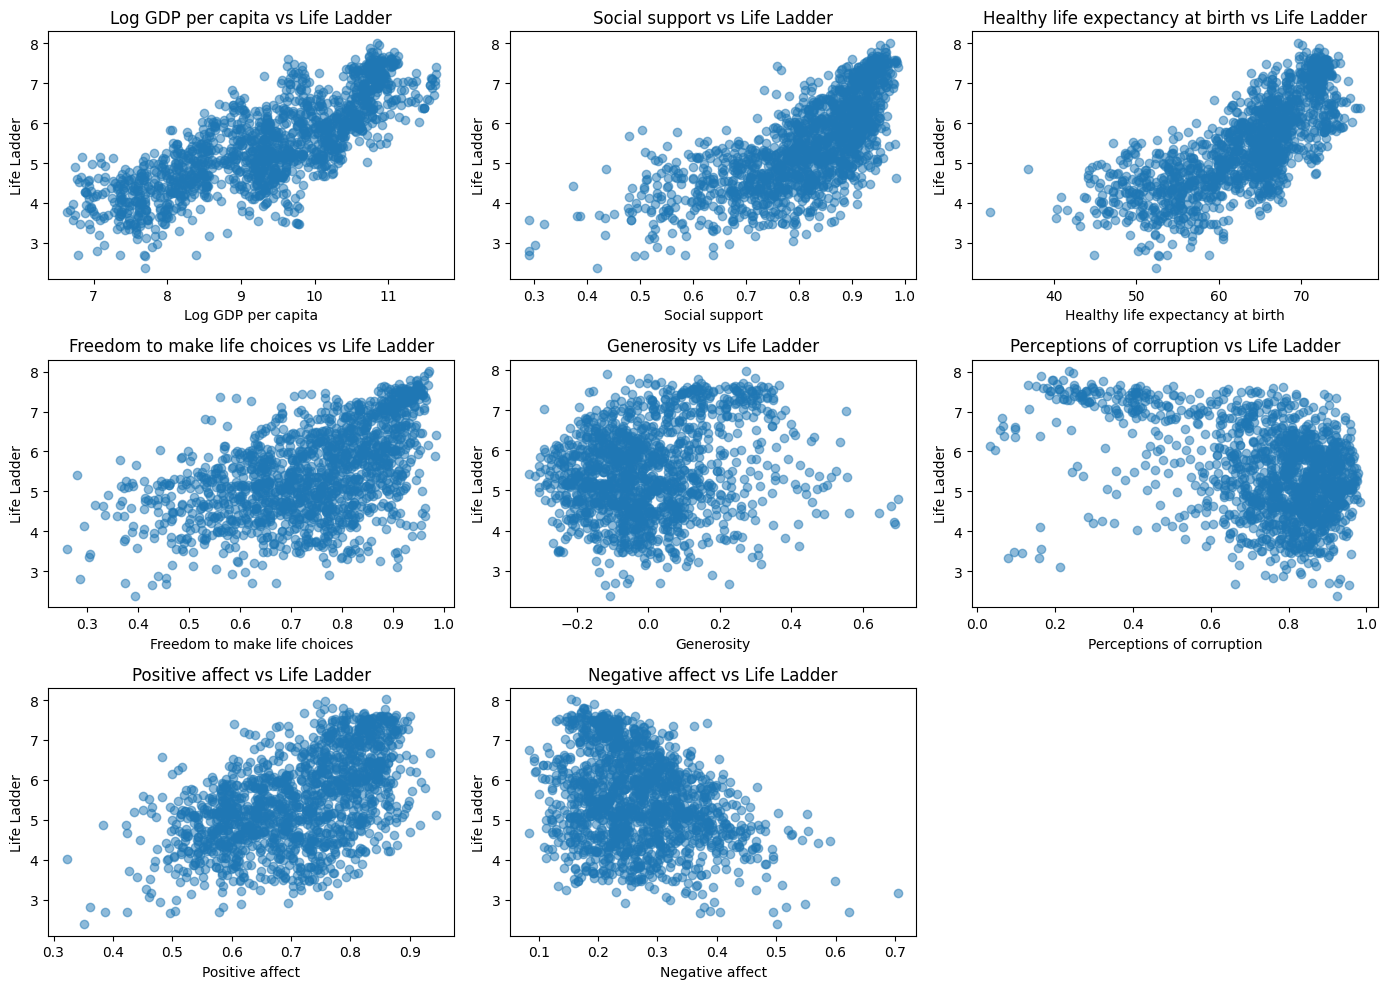

In [21]:
# Scatter Plots

attributes = train_data.columns.drop("Life Ladder")

plt.figure(figsize=(14,10))

for i, col in enumerate(attributes, 1):
  plt.subplot(3,3,i)
  plt.scatter(train_data[col], train_data["Life Ladder"], alpha=0.5)
  plt.title(f"{col} vs Life Ladder")
  plt.xlabel(col)
  plt.ylabel("Life Ladder")

plt.tight_layout()
plt.show()

**Part C Summary:**

Using Pearson Correlation Coefficients and scatter plots, I was able to analyze relationships between attributes and the target variable, Life Ladder.

Strong positive correlations were found between Life Ladder and Log GDP per capita, Social Support, Health Life Expectancy, Freedom to Make Life Choices, and Positive Affect. Negative correlations were seen with Perceptions of corrpution and Negative affect.

These results suggest that a combination economic, social, and emotional factors are associated with happiness.

# **PART D:**

Train a Linear Regression model using the training data with four-fold cross-validation and with appropriate evaluation metric.

In [22]:
# Import from sklearn and set up variables

from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

X = train_data.drop(columns=["Life Ladder"])
y = train_data["Life Ladder"].values

In [23]:
# Closed Form (Normal Equation)

cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Imputer to fill missing values with median
imputer = SimpleImputer(strategy="median")

normal_eq_rmse = []

for fold, (train_id, val_id) in enumerate(cv.split(X), start=1):
  X_train, X_val = X.iloc[train_id], X.iloc[val_id]
  y_train, y_val = y[train_id], y[val_id]

  X_train_imp = imputer.fit_transform(X_train)
  X_val_imp = imputer.transform(X_val)

  lin_reg = LinearRegression()
  lin_reg.fit(X_train_imp, y_train)
  y_hat = lin_reg.predict(X_val_imp)

  fold_rmse = rmse(y_val, y_hat)
  normal_eq_rmse.append(fold_rmse)
  print(f"Normal EQ Fold {fold} RMSE: {fold_rmse:.4f}")

print(f"Normal EQ Mean 4-fold RMSE: {np.mean(normal_eq_rmse):.4f} +/- {np.std(normal_eq_rmse):.4f}")

Normal EQ Fold 1 RMSE: 0.6015
Normal EQ Fold 2 RMSE: 0.5274
Normal EQ Fold 3 RMSE: 0.5336
Normal EQ Fold 4 RMSE: 0.5318
Normal EQ Mean 4-fold RMSE: 0.5486 +/- 0.0307


In [24]:
# SGD

sgd_rmse = []

for fold, (train_id, val_id) in enumerate(cv.split(X), start=1):
  X_train, X_val = X.iloc[train_id], X.iloc[val_id]
  y_train, y_val = y[train_id], y[val_id]

  X_train_imp = imputer.fit_transform(X_train)
  X_val_imp = imputer.transform(X_val)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imp)
  X_val_scaled = scaler.transform(X_val_imp)

  sgd = SGDRegressor(max_iter=5000, tol=1e-4, penalty=None, random_state=42)

  sgd.fit(X_train_scaled, y_train)
  y_hat = sgd.predict(X_val_scaled)

  fold_rmse = rmse(y_val, y_hat)
  sgd_rmse.append(fold_rmse)

  print(f"SGD Fold {fold} RMSE: {fold_rmse:.4f}")

print(f"SGD Mean RMSE: {np.mean(sgd_rmse):.4f} +/- {np.std(sgd_rmse):.4f}")

SGD Fold 1 RMSE: 0.6022
SGD Fold 2 RMSE: 0.5275
SGD Fold 3 RMSE: 0.5336
SGD Fold 4 RMSE: 0.5328
SGD Mean RMSE: 0.5490 +/- 0.0308


In [25]:
# Regularization

alphas = [0.0001, 0.001, 0.01]
etas = [0.001, 0.01]

results = []

for penalty_type in ["l2", "l1", "elasticnet"]:
  for alpha in alphas:
    for eta in etas:

      fold_rmse = []

      for train_id, val_id in cv.split(X):
        X_train, X_val = X.iloc[train_id], X.iloc[val_id]
        y_train, y_val = y[train_id], y[val_id]

        X_train_imp = imputer.fit_transform(X_train)
        X_val_imp = imputer.transform(X_val)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_imp)
        X_val_scaled = scaler.transform(X_val_imp)

        model = SGDRegressor(penalty=penalty_type, alpha = alpha, l1_ratio=0.5,
                             learning_rate="constant", eta0=eta, max_iter=5000,
                             tol=1e-4, random_state=42)

        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_val_scaled)

        fold_rmse.append(rmse(y_val, predictions))



      print(f"Penalty={penalty_type}, alpha={alpha}, eta={eta}, RMSE={np.mean(fold_rmse):.4f}")

      results.append([penalty_type, alpha, eta, np.mean(fold_rmse)])

results_df = pd.DataFrame(results, columns=["Penalty", "Alpha", "Eta", "Mean_RMSE"])
results_df_sorted = results_df.sort_values("Mean_RMSE")
results_df_sorted.head(10)

best = results_df_sorted.iloc[0]
best

Penalty=l2, alpha=0.0001, eta=0.001, RMSE=0.5490
Penalty=l2, alpha=0.0001, eta=0.01, RMSE=0.5539
Penalty=l2, alpha=0.001, eta=0.001, RMSE=0.5490
Penalty=l2, alpha=0.001, eta=0.01, RMSE=0.5539
Penalty=l2, alpha=0.01, eta=0.001, RMSE=0.5489
Penalty=l2, alpha=0.01, eta=0.01, RMSE=0.5511
Penalty=l1, alpha=0.0001, eta=0.001, RMSE=0.5489
Penalty=l1, alpha=0.0001, eta=0.01, RMSE=0.5539
Penalty=l1, alpha=0.001, eta=0.001, RMSE=0.5489
Penalty=l1, alpha=0.001, eta=0.01, RMSE=0.5538
Penalty=l1, alpha=0.01, eta=0.001, RMSE=0.5494
Penalty=l1, alpha=0.01, eta=0.01, RMSE=0.5539
Penalty=elasticnet, alpha=0.0001, eta=0.001, RMSE=0.5490
Penalty=elasticnet, alpha=0.0001, eta=0.01, RMSE=0.5539
Penalty=elasticnet, alpha=0.001, eta=0.001, RMSE=0.5486
Penalty=elasticnet, alpha=0.001, eta=0.01, RMSE=0.5538
Penalty=elasticnet, alpha=0.01, eta=0.001, RMSE=0.5489
Penalty=elasticnet, alpha=0.01, eta=0.01, RMSE=0.5538


,14
Penalty,elasticnet
Alpha,0.001
Eta,0.001
Mean_RMSE,0.548586


In [26]:
# Train model with best results

best_penalty = best["Penalty"]
best_alpha = best["Alpha"]
best_eta = best["Eta"]

X_imp_all = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_imp_all)

best_model = SGDRegressor(penalty=best_penalty, alpha=best_alpha, l1_ratio=0.5,
                          learning_rate="constant", eta0=best_eta, max_iter=5000,
                          tol=1e-4, random_state=42)

best_model.fit(X_scaled_all, y)

SGDRegressor(alpha=np.float64(0.001), eta0=np.float64(0.001), l1_ratio=0.5,
             learning_rate='constant', max_iter=5000, penalty='elasticnet',
             random_state=42, tol=0.0001)

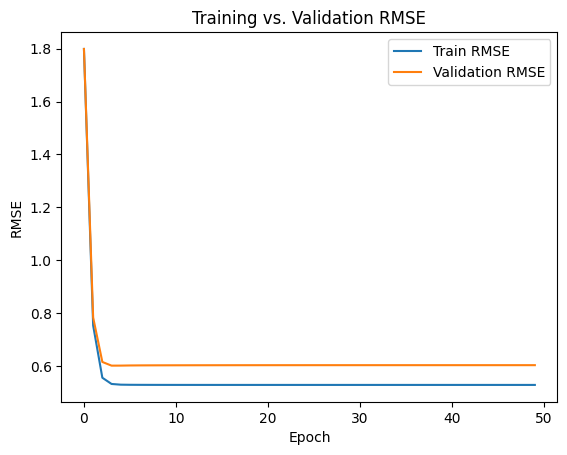

In [27]:
# Plot results

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_imp = imputer.fit_transform(X_train)
X_val_imp = imputer.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_val_scaled = scaler.transform(X_val_imp)

epochs = 50
train_rmse = []
val_rmse = []

sgd_epoch = SGDRegressor(penalty=best_penalty, alpha=best_alpha, l1_ratio=0.5,
                          learning_rate="constant", eta0=best_eta, max_iter=1,
                          warm_start=True, tol=None, random_state=42)

for epoch in range(epochs):
  sgd_epoch.fit(X_train_scaled, y_train)

  train_pred = sgd_epoch.predict(X_train_scaled)
  val_pred = sgd_epoch.predict(X_val_scaled)

  train_rmse.append(rmse(y_train, train_pred))
  val_rmse.append(rmse(y_val, val_pred))

plt.plot(train_rmse, label="Train RMSE")
plt.plot(val_rmse, label="Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.title("Training vs. Validation RMSE")
plt.show()

**Part D Summary:**

In part D, I performed linear regression using both the closed form Normal Equation and SGD with 4-fold cross validation. Then regularization using Ridge, Lasso, and Elastic Net were evaluated with various combinations of alpha values and learning rates.

The best linear model was Ridge with an alpha = 0.0001 and learning rate = 0.001, with an RMSE of roughly 0.549.

# **PART E:**

Train a Polynomial Regression Regression model.

In [28]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

#degrees = [2,3]

poly_results = []

for penalty_type in ["l2", "l1", "elasticnet"]:
  for alpha in alphas:
    for eta in etas:

      fold_rmse = []
      for train_id, val_id in cv.split(X):
        X_train, X_val = X.iloc[train_id], X.iloc[val_id]
        y_train, y_val = y[train_id], y[val_id]

        X_train_imp = imputer.fit_transform(X_train)
        X_val_imp = imputer.transform(X_val)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_imp)
        X_val_scaled = scaler.transform(X_val_imp)

        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_val_poly = poly.transform(X_val_scaled)

        model = SGDRegressor(penalty=penalty_type, alpha=alpha, l1_ratio=0.5,
                            learning_rate="constant", eta0=eta, max_iter=5000,
                            tol=1e-4, random_state=42)

        model.fit(X_train_poly, y_train)
        predictions = model.predict(X_val_poly)

        fold_rmse.append(rmse(y_val, predictions))

      mean_rmse = np.mean(fold_rmse)

      print(f"Degree=2, Penalty={penalty_type}, alpha={alpha}, eta={eta}, RMSE={mean_rmse:.4f}")

      poly_results.append([2, penalty_type, alpha, eta, mean_rmse])

poly_df = pd.DataFrame(poly_results, columns=["Degree", "Penalty", "Alpha", "Eta", "Mean_RMSE"])
poly_df_sorted = poly_df.sort_values("Mean_RMSE")
poly_df_sorted.head(10)

best_poly = poly_df_sorted.iloc[0]
best_poly

Degree=2, Penalty=l2, alpha=0.0001, eta=0.001, RMSE=0.5225
Degree=2, Penalty=l2, alpha=0.0001, eta=0.01, RMSE=76616.5558
Degree=2, Penalty=l2, alpha=0.001, eta=0.001, RMSE=0.5222
Degree=2, Penalty=l2, alpha=0.001, eta=0.01, RMSE=71590.2804
Degree=2, Penalty=l2, alpha=0.01, eta=0.001, RMSE=0.5203
Degree=2, Penalty=l2, alpha=0.01, eta=0.01, RMSE=49298.6704
Degree=2, Penalty=l1, alpha=0.0001, eta=0.001, RMSE=0.5214
Degree=2, Penalty=l1, alpha=0.0001, eta=0.01, RMSE=74090.2524
Degree=2, Penalty=l1, alpha=0.001, eta=0.001, RMSE=0.5180
Degree=2, Penalty=l1, alpha=0.001, eta=0.01, RMSE=45204.6150
Degree=2, Penalty=l1, alpha=0.01, eta=0.001, RMSE=0.5215
Degree=2, Penalty=l1, alpha=0.01, eta=0.01, RMSE=4564.9697
Degree=2, Penalty=elasticnet, alpha=0.0001, eta=0.001, RMSE=0.5219
Degree=2, Penalty=elasticnet, alpha=0.0001, eta=0.01, RMSE=75309.8691
Degree=2, Penalty=elasticnet, alpha=0.001, eta=0.001, RMSE=0.5190
Degree=2, Penalty=elasticnet, alpha=0.001, eta=0.01, RMSE=59896.0605
Degree=2, Penal

,16
Degree,2
Penalty,elasticnet
Alpha,0.01
Eta,0.001
Mean_RMSE,0.511828


**Part E Summary:**

Part E repeats the actions of part D, but uses polynomial regression implemented using SGD with degrees 2 and 3. Degree 2 improved performance with a cross validation RMSE of roughly 0.5118, suggesting some nonlinear relationships. On the other hand, degree 3 gave results with very large RMSE values, indicating overfitting on the training data. I removed testing of degree 3 for simplicity.

These results show the bias/variance tradeoff, increasing the complexity increased the variance.

# **PART F:**

Make predictions of the labels on the test data, using the trained model with chosen (best) hyperparameters.

In [29]:
# Test data predictions

test_data = pd.read_csv("happiness_data_test.csv")

X_test = test_data.drop(columns=["Life Ladder"])
y_test = test_data["Life Ladder"].values

imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_imp = imputer.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train_imp)
X_train_poly = poly.fit_transform(X_train_scaled)

best_model = SGDRegressor(
    penalty="elasticnet",
    alpha=0.01,
    l1_ratio=0.5,
    learning_rate="constant",
    eta0=0.001,
    max_iter=5000,
    tol=1e-4,
    random_state=42
)

best_model.fit(X_train_poly, y)

X_test_imp = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imp)
X_test_poly = poly.transform(X_test_scaled)

test_predictions = best_model.predict(X_test_poly)
test_rmse = rmse(y_test, test_predictions)

print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.5116


[ 0.33227139  0.26932351  0.33230975  0.0466376   0.05862924 -0.0841589
  0.20591824  0.          0.00969491  0.          0.          0.
  0.04074227  0.02793248  0.05410203 -0.05159638  0.01742717  0.0639593
  0.03374262 -0.00955691 -0.07656187  0.          0.03674984  0.05099488
  0.         -0.00497999  0.          0.          0.          0.
 -0.00989663  0.         -0.02650528  0.         -0.04275292  0.
  0.         -0.02623375 -0.00881242 -0.00456625 -0.0414482   0.00941423
  0.05019426  0.        ]
[5.420056]


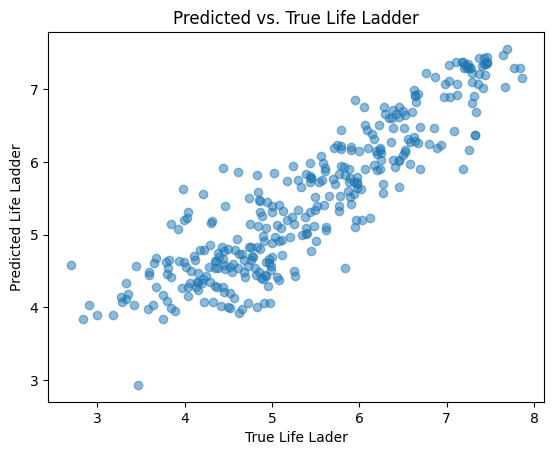

In [30]:
# Other results

print(best_model.coef_)
print(best_model.intercept_)

plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("True Life Lader")
plt.ylabel("Predicted Life Ladder")
plt.title("Predicted vs. True Life Ladder")
plt.show()

**Part F Summary:**

The best performing model was a degree 2 polynomial regression with Elastic Net regularization (alpha = 0.01, eta = 0.001). The model was then retrained on the full training dataset and evaluated on the test data.

The resulting test RMSE was 0.5116 which is very close to the cross-validation RMSE 0.5118, which shows strong generalization and no signs of overfitting.